<a href="https://colab.research.google.com/github/anhtran123-max/Classify-song-genres-from-audio-dataset/blob/main/Model_Classify_song_genres_from_audio_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Storage Enviroment

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
%cd /content/drive/Shareddrives/Google Drive Unlimited/learn-Data-Science/Dataset/Classify-song-genres-from-audio-dataset

/content/drive/Shareddrives/Google Drive Unlimited/learn-Data-Science/Dataset/Classify-song-genres-from-audio-dataset


# Import library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import operator
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import metrics
%matplotlib inline

# Loading data

In [4]:
%ls

echonest-metrics.json  fma-rock-vs-hiphop.csv


In [5]:
tracks = pd.read_csv('fma-rock-vs-hiphop.csv')

In [6]:
echonest_metrics = pd.read_json('echonest-metrics.json', precise_float=True)

# Data Visualization

In [26]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [27]:
tracks

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy


In [28]:
tracks.describe()

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
count,17734.000000,17734.000000,17734.000000,17734.000000,17734.000000,1.773400e+04,17734.000000,17734.000000
mean,69394.145991,258971.413781,0.020695,220.942934,1.685237,1.678238e+03,1079.709541,6.184110
std,45784.589753,61535.621463,0.270070,177.906821,6.629402,9.394969e+03,4693.497635,7.075062
min,2.000000,-1.000000,0.000000,2.000000,0.000000,1.800000e+01,9.000000,0.000000
25%,29979.000000,220982.000000,0.000000,139.000000,0.000000,4.210000e+02,214.000000,2.000000
50%,64193.500000,256000.000000,0.000000,192.000000,1.000000,8.240000e+02,461.000000,5.000000
75%,109442.750000,320000.000000,0.000000,255.000000,2.000000,1.628000e+03,1018.000000,8.000000
max,155319.000000,448000.000000,24.000000,3675.000000,554.000000,1.038669e+06,433992.000000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bf9bbec90>,
      dtype=object)

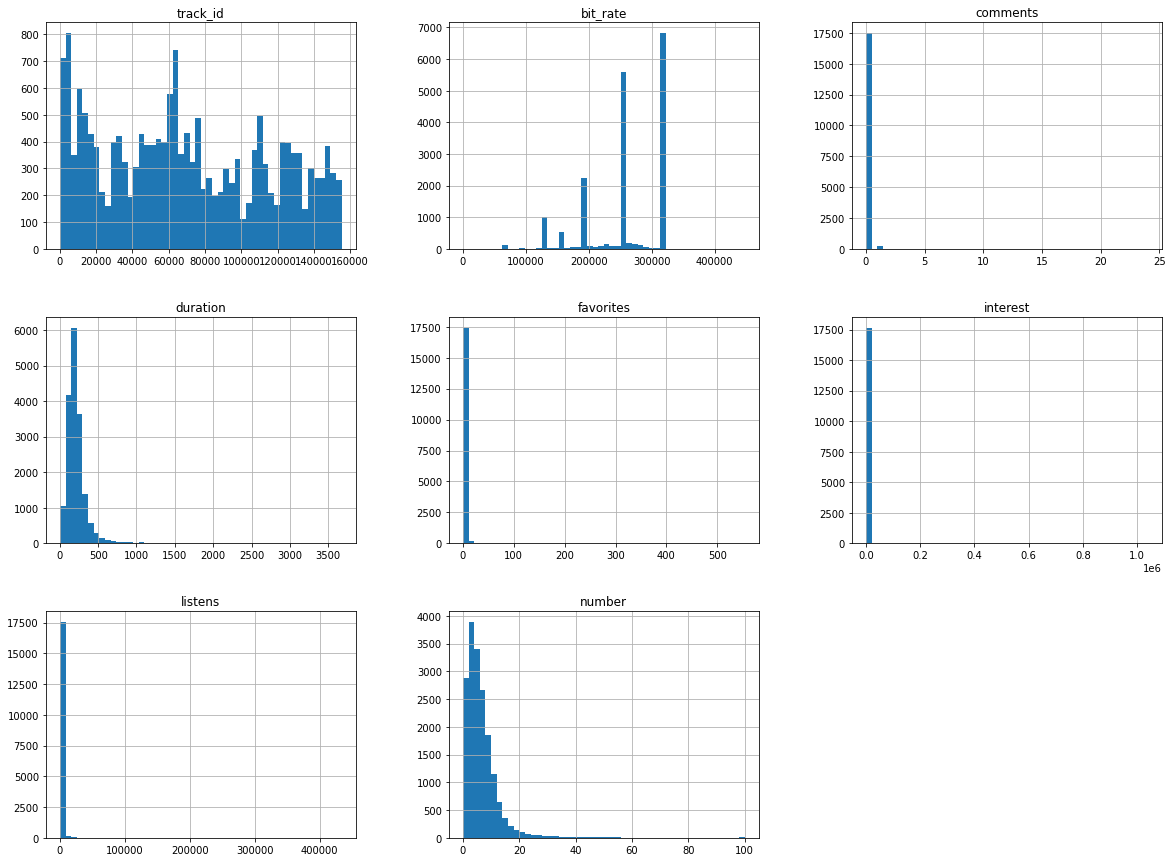

In [29]:
tracks.hist(bins=50, figsize=(20, 15))

In [30]:
tracks.corr()

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
track_id,1.000000,0.240970,0.002342,-0.029592,-0.010985,0.004141,0.038695,0.030860
bit_rate,0.240970,1.000000,-0.002230,0.023969,-0.001800,-0.022650,-0.017140,0.074227
comments,0.002342,-0.002230,1.000000,0.023166,0.630017,0.417699,0.412506,-0.017872
duration,-0.029592,0.023969,0.023166,1.000000,0.008260,-0.005068,-0.004090,-0.039274
favorites,-0.010985,-0.001800,0.630017,0.008260,1.000000,0.667735,0.677138,-0.038298
interest,0.004141,-0.022650,0.417699,-0.005068,0.667735,1.000000,0.945520,-0.017139
listens,0.038695,-0.017140,0.412506,-0.004090,0.677138,0.945520,1.000000,-0.022499
number,0.030860,0.074227,-0.017872,-0.039274,-0.038298,-0.017139,-0.022499,1.000000


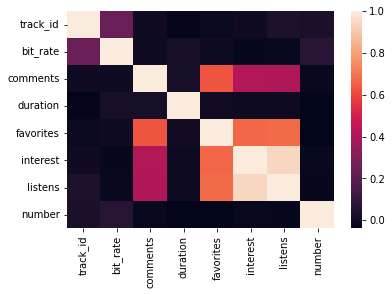

In [31]:
sns.heatmap(tracks.corr())

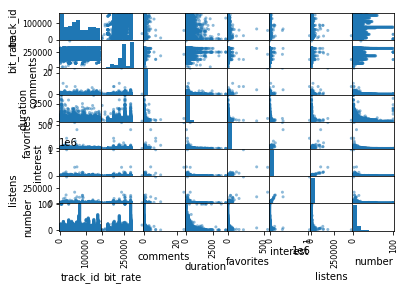

In [32]:
scatter_matrix(tracks)
plt.show()

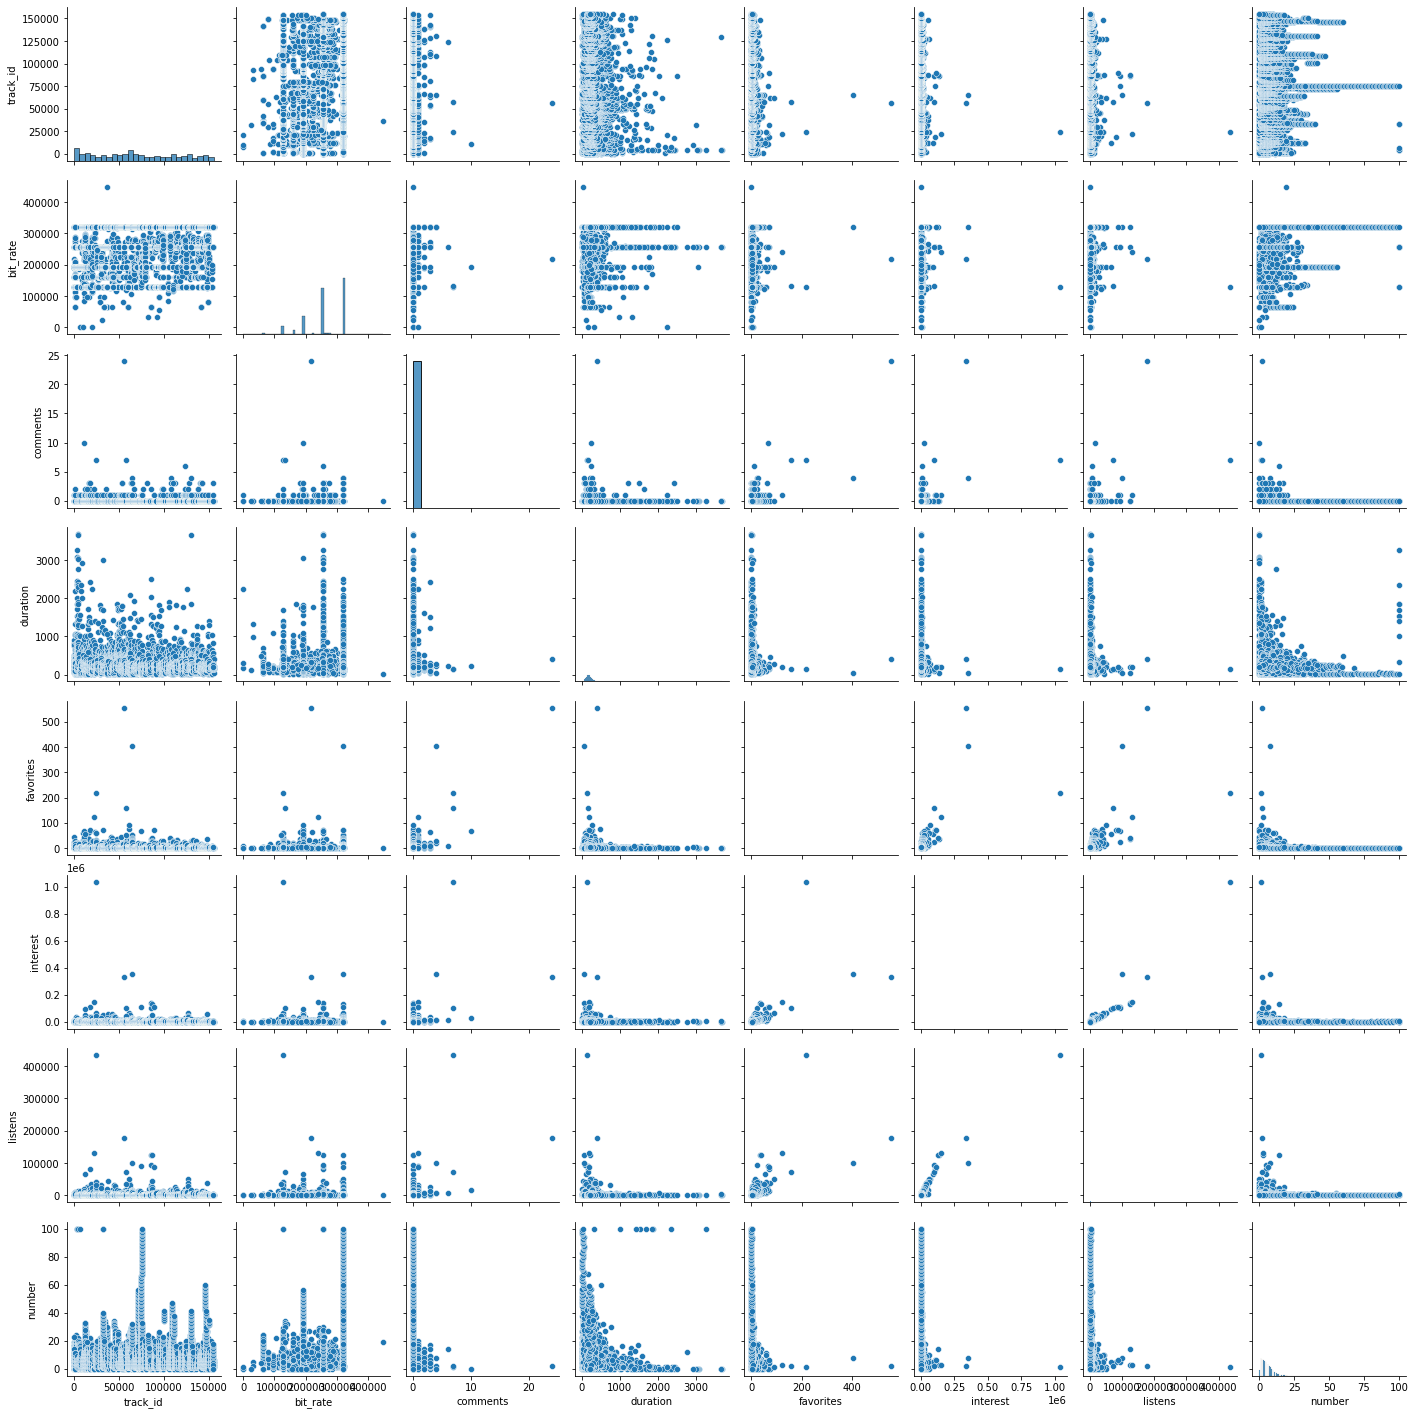

In [33]:
sns.pairplot(tracks)

# Labeling the features

In [35]:
x=tracks[['bit_rate','comments','duration','favorites','interest','listens','number']]
x

,bit_rate,comments,duration,favorites,interest,listens,number
0,256000,1,837,0,2484,1832,0
1,256000,1,509,0,1948,1498,0
2,192000,0,192,0,701,148,4
3,192000,0,193,0,637,98,11
4,256000,0,405,5,354,424,2
...,...,...,...,...,...,...,...
17729,320000,0,283,3,1283,1050,4
17730,320000,0,250,2,1077,858,2
17731,320000,0,219,3,1340,1142,1
17732,320000,0,252,6,2065,1474,3


In [36]:
b=[]
b=tracks['genre_top']

In [37]:
y=[]

**0 used for Hip-Hop**

**1 used for Rock**

In [38]:
for i in b:
    if i=='Hip-Hop':
        y.append(0)
    elif i=='Rock':
        y.append(1)

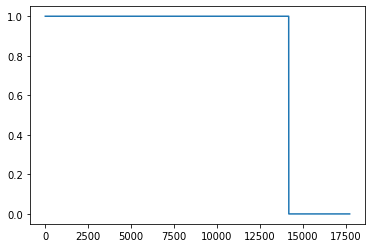

In [39]:
plt.plot(y)

# Training the model using Some Algorithms

## 1, Principle Component Analysis

In [40]:
normalized_X = preprocessing.normalize(x)

[ 81.9   95.54  99.17 100.   100.  ]


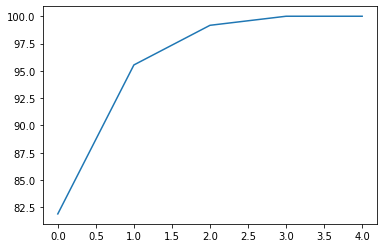

In [41]:
x=tracks.values

#Scaling the values
#X = scale(x)

pca = PCA(n_components=5)

pca.fit(normalized_X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print (var1)
plt.plot(var1)

In [42]:
pca = PCA(n_components=3)
pca.fit(normalized_X)
x1=pca.fit_transform(normalized_X)

print(x1)

[[ 3.26935845e-03 -9.27879110e-04  2.65638560e-03]
 [ 9.86042566e-04 -4.90013226e-04  1.51219468e-03]
 [-4.41697156e-03  1.79435836e-03 -1.29944278e-03]
 ...
 [-2.74893035e-03  6.65384759e-04  7.87380378e-05]
 [-5.52209339e-04 -3.38101360e-04  2.22424251e-04]
 [-2.82716455e-03  7.15683885e-04 -1.93862062e-04]]


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(x1, y, test_size=0.2, random_state=0)

## 2, Logistic Regression

In [44]:
model= LogisticRegression(solver='liblinear', multi_class='ovr')

In [45]:
model.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [46]:
y_pred=model.predict(X_test)

### Accuracy Score of Logistic Regression Model

In [47]:
print(accuracy_score(Y_test, y_pred))

0.7933464899915421


### Confusion matrix of Logistic Regression Model

In [48]:
print(confusion_matrix(Y_test,y_pred))

[[   2  732]
 [   1 2812]]


### Classification report of Logistic Regreesion Model

In [49]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.00      0.01       734
           1       0.79      1.00      0.88      2813

    accuracy                           0.79      3547
   macro avg       0.73      0.50      0.45      3547
weighted avg       0.77      0.79      0.70      3547



### Various Analysis of Predicted Value & Actual value

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.20665351000845786
Mean Squared Error: 0.20665351000845786
Root Mean Squared Error: 0.4545915859411147


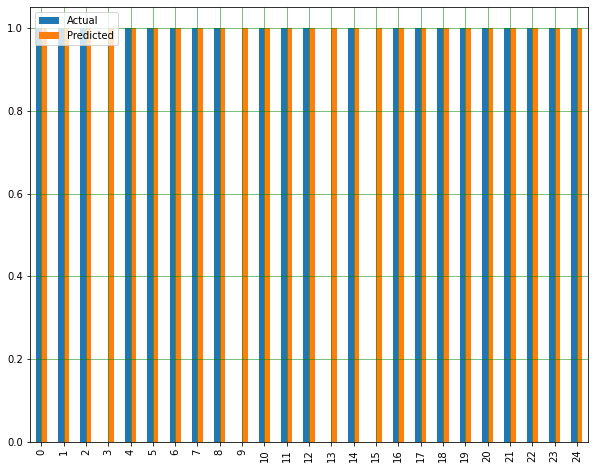

In [51]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

## 3, Linear Discriminant Analysis

In [52]:
model=LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [53]:
y_pred=model.predict(X_test)

### Accuracy Score of Linear Discriminant Analysis Model

In [54]:
print(accuracy_score(Y_test, y_pred))

0.7927826332111644


### Confusion Matrix of Linear Discriminant Analysis Model

In [56]:
print(confusion_matrix(Y_test,y_pred))

[[   6  728]
 [   7 2806]]


### Classification Report of Linear Discriminant Analysis Model

In [57]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.01      0.02       734
           1       0.79      1.00      0.88      2813

    accuracy                           0.79      3547
   macro avg       0.63      0.50      0.45      3547
weighted avg       0.73      0.79      0.70      3547



### Various Analysis of Predicted Value & Actual valu

In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.20721736678883562
Mean Squared Error: 0.20721736678883562
Root Mean Squared Error: 0.4552113429922805


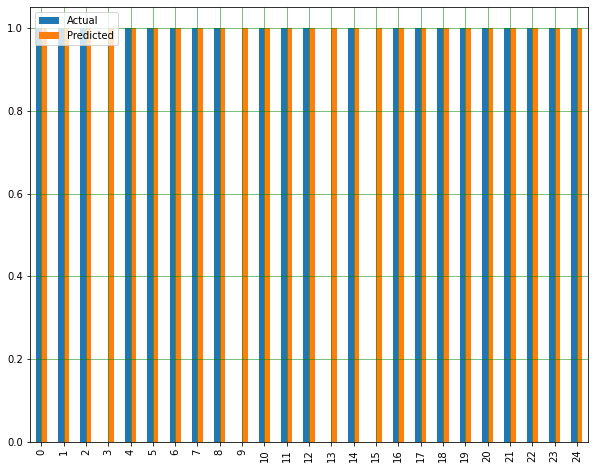

In [59]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

## 4, K Neighbors Classifier

In [60]:
model=KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [61]:
y_pred=model.predict(X_test)

### Accuracy Score of K Neighbors Classifier Model

In [62]:
print(accuracy_score(Y_test, y_pred))

0.7631801522413307


### Confusion Matrix of K Neighbors Classifier Model

In [63]:
print(confusion_matrix(Y_test,y_pred))

[[  91  643]
 [ 197 2616]]


### Classification Report of K Neighbors Classifier Model

In [64]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.12      0.18       734
           1       0.80      0.93      0.86      2813

    accuracy                           0.76      3547
   macro avg       0.56      0.53      0.52      3547
weighted avg       0.70      0.76      0.72      3547



### Various Analysis of Predicted Value & Actual value

In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.2368198477586693
Mean Squared Error: 0.2368198477586693
Root Mean Squared Error: 0.48664139544295787


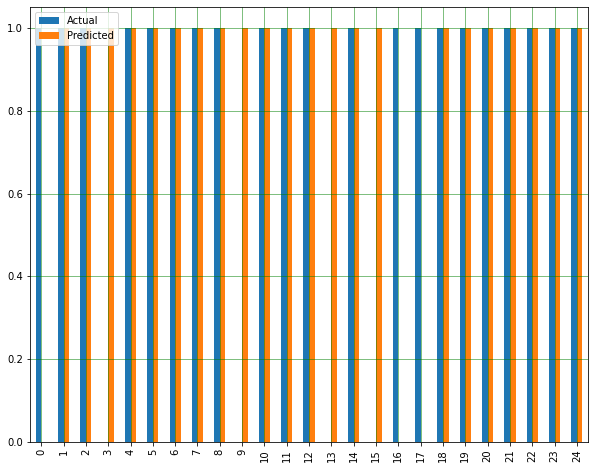

In [66]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

## 5, Decision Tree Classifier

In [67]:
model=DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

### Accuracy Score of Decision Tree Classifier Model

In [68]:
print(accuracy_score(Y_test, y_pred))

0.7631801522413307


### Confusion Matrix of Decision Tree Classifier Model

In [69]:
print(confusion_matrix(Y_test,y_pred))

[[  91  643]
 [ 197 2616]]


### Classification Report of Decision Tree Classifier Model

In [70]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.12      0.18       734
           1       0.80      0.93      0.86      2813

    accuracy                           0.76      3547
   macro avg       0.56      0.53      0.52      3547
weighted avg       0.70      0.76      0.72      3547



### Various Analysis of Predicted Value & Actual value

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.2368198477586693
Mean Squared Error: 0.2368198477586693
Root Mean Squared Error: 0.48664139544295787


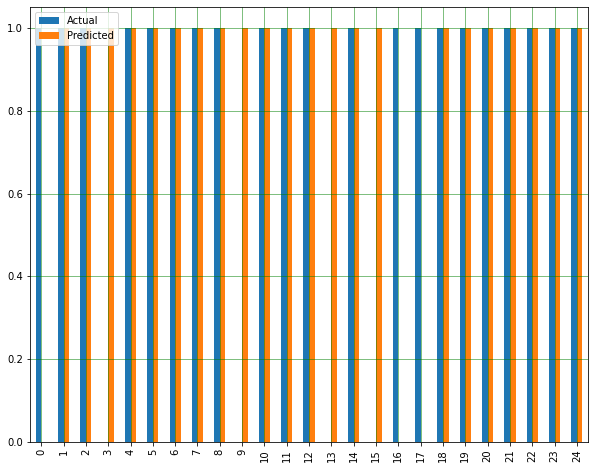

In [72]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

## 6, Support Vector Machine(SVM) Classification

In [73]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)

SVC(gamma='auto')

### Accuracy Score of SVM Model

In [74]:
print(accuracy_score(Y_test, y_pred))

0.7631801522413307


### Confusion Matrix of SVM Model

In [75]:
print(confusion_matrix(Y_test,y_pred))

[[  91  643]
 [ 197 2616]]


### Classification Report of SVM Model

In [76]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.12      0.18       734
           1       0.80      0.93      0.86      2813

    accuracy                           0.76      3547
   macro avg       0.56      0.53      0.52      3547
weighted avg       0.70      0.76      0.72      3547



### Various Analysis of Predicted Value & Actual value

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.2368198477586693
Mean Squared Error: 0.2368198477586693
Root Mean Squared Error: 0.48664139544295787


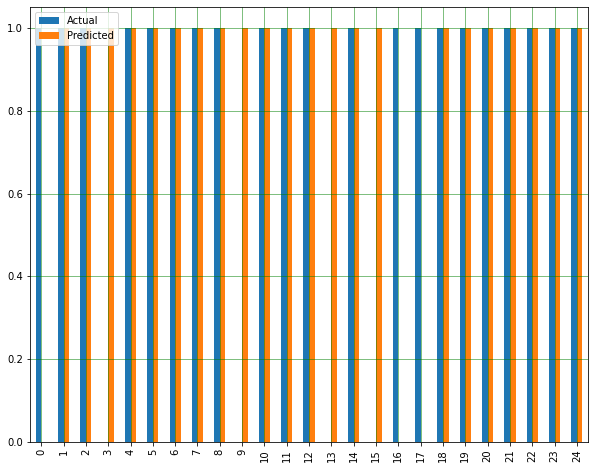

In [78]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

## 7, Gaussian NB Classifier

In [79]:
model=GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

### Accuracy Score of Gaussian NB Model

In [80]:
print(accuracy_score(Y_test, y_pred))

0.7631801522413307


### Confusion Matrix of Gaussian NB Model

In [81]:
print(confusion_matrix(Y_test,y_pred))

[[  91  643]
 [ 197 2616]]


### Classification Report of Gaussian NB Model

In [82]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.12      0.18       734
           1       0.80      0.93      0.86      2813

    accuracy                           0.76      3547
   macro avg       0.56      0.53      0.52      3547
weighted avg       0.70      0.76      0.72      3547



### Various Analysis of Predicted Value & Actual value

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.2368198477586693
Mean Squared Error: 0.2368198477586693
Root Mean Squared Error: 0.48664139544295787


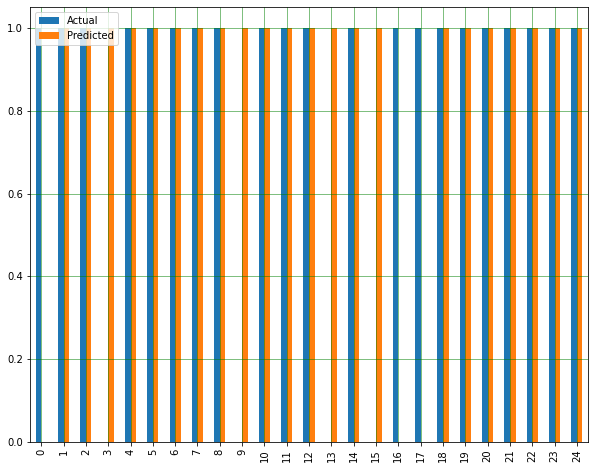

In [84]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

# Evaluating Each Model on Turn

In [86]:
models = [] 

In [88]:
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('GNB', GaussianNB()))

In [89]:
results = []
names = []

In [90]:
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.801297 (0.000843)
LDA: 0.800874 (0.001973)
KNC: 0.767534 (0.008238)
DTC: 0.689787 (0.011018)
SVM: 0.801367 (0.000237)
GNB: 0.800451 (0.002716)
